In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import requests
import time
import logging

# Import API key
import all_api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    cityObj = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = cityObj.city_name
    country = cityObj.country_code
    city_country = city + ',' + country
    city_country = re.sub(r' ', '+', city_country)   # Substitute spaces (global) to create valid URLs
    
    # If the city is unique, then add it to our cities list
    if city_country not in cities:
        cities.append(city_country)

        
# Print the city count to confirm sufficient count
len(cities)

#pprint(cities)

633

## Perform API Calls

In [40]:
# Initialize empty arrays for weather results
found_cities = []
lats = []
lons = []
temps = []
humidities = []
cloudinesses = []
windspeeds = []

# OpenWeatherMap API Key
api_key = all_api_keys.OpenWeatherMap_key

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?APPID=" + api_key + '&units=imperial' + "&q="

# Loop through the list of cities and perform a request for data on each
for city in cities:
    url = base_url + city
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    if weather_json['cod'] != '404':
        found_cities.append(city)
        lats.append(weather_json['coord']['lat'])
        lons.append(weather_json['coord']['lon'])
        temps.append(weather_json['main']['temp'])
        humidities.append(weather_json['main']['humidity'])
        cloudinesses.append(weather_json['clouds']['all'])
        windspeeds.append(weather_json['wind']['speed'])
        pprint(weather_json)
        print(city + ',' + str(weather_json['id']))
    else:
        print(city + ',' + 'Not Found')
print(len(found_cities))


In [39]:
# Create a data frame from following arrary sets: cities, lats, temps, humidities, cloudinesses, windSpeeds
weather_dict = {
    "city": found_cities,
    "lat": lats,
    "lon": lons,
    "temp": temps,
    "humidity": humidities,
    "cloudiness": cloudinesses,
    "windspeed": windspeeds
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

#Save as a csv
#Note to avoide any issues later, use encoding="utf-8"
weather_data.to_csv("WhatIsWeatherLikeInWorldCities.csv", encoding="utf-8", index=False) 

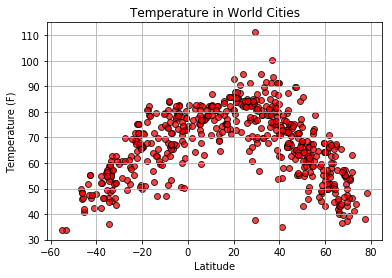

In [38]:
# Build a scatter plot for Temperature (F) vs. Latitude
plt.scatter(weather_data['lat'],weather_data['temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

In [26]:
#save the figure
plt.savefig("WeatherWorldCitiesTemperatureVsLatitude.png")

<Figure size 432x288 with 0 Axes>

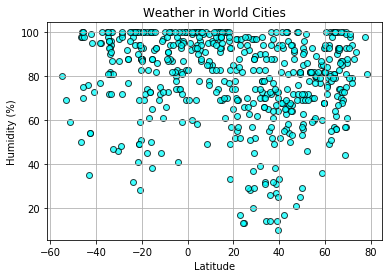

In [27]:
# Build a scatter plot for Humidity (%) vs. Latitude
plt.scatter(weather_data['lat'],weather_data['humidity'], marker="o", facecolors="cyan", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("Weather in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

In [42]:
#save the figure
plt.savefig("WeatherWorldCitiesHumidityVsLatitude.png")

<Figure size 432x288 with 0 Axes>

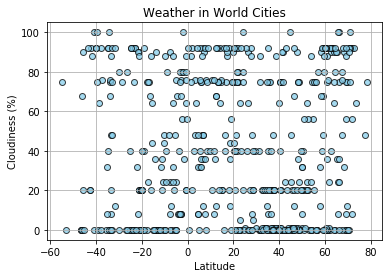

In [9]:
# Build a scatter plot for Cloudiness (%) vs. Latitude
plt.scatter(weather_data['lat'],weather_data['cloudiness'], marker="o", facecolors="SkyBlue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("Weather in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show()

In [10]:
plt.savefig("WeatherWorldCitiesCloudinessVsLatitude.png")

<Figure size 432x288 with 0 Axes>

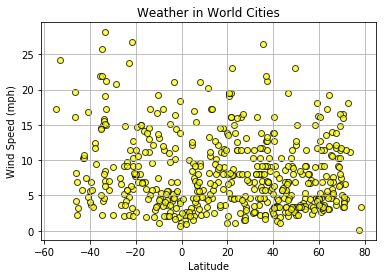

In [11]:
# Build a scatter plot for Cloudiness (%) vs. Latitude
plt.scatter(weather_data['lat'],weather_data['windspeed'], marker="o", facecolors="yellow", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("Weather in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

In [12]:
#save the figure
plt.savefig("WeatherWorldCitiesWindSpeedVsLatitude.png")

<Figure size 432x288 with 0 Axes>

In [13]:
#  love this tip from Tyler for future reference
#It _does_ have a dictionary of `{(lat, lng): cityObj}` in the module called WORLD_CITIES_DICT (edited)
#If you want, you could flip that dictionary into `{(city_name, country_name): (lat, lng)}`, 
#which would let you do lookups by city name and country name
#>>> from citipy.citipy import WORLD_CITIES_DICT
#>>> lat_lng_by_city_country = {(city.city_name, city.country_code):lat_lng for lat_lng, city in WORLD_CITIES_DICT.items()}
#>>> lat_lng_by_city_country[('san diego', 'us')]
#(32.7152778, -117.1563889)

In [14]:
# Since it's random, how can initialze the result so we get the same random output 